In [31]:
import pymc as pm
import math
import numpy as np
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

## Método de Monte Carlo

### Função escolhida: Distribuição de Cauchy Padrão
$f(x) = \frac{1}{\pi(1+x^2)}$

### Área a ser calculada

$\int_{0}^{0.77} \frac{1}{\pi(1+x^2)} \,dx = P(0 \leq X \leq 0.77)$

com $X \sim Cauchy(0,1)$

em que $\alpha = 0$ e $\beta = 1$

In [2]:
base = 0.77
altura = 1/math.pi
base, altura

(0.77, 0.3183098861837907)

In [3]:
with pm.Model() as model:
  X = pm.Uniform("X",0.1,base,shape=3000)
  Y = pm.Uniform("Y",0,altura,shape=3000)

In [4]:
model

In [5]:
with model:
  trace = pm.sample()

In [6]:
amostrasX = trace.posterior["X"].values[1][999]
amostrasY = trace.posterior["Y"].values[1][999]

In [7]:
pedras = list(zip(amostrasX,amostrasY))
len(pedras)

3000

In [20]:
def func(x):
  return 1/(math.pi*(1+x**2))

In [53]:
ct = 0
for (x,y) in pedras:
  if (y <= func(x)):
    ct += 1

print(ct)

print(f"Area estimada: {(base-0.1)*altura*ct/len(pedras)}")
print("Area real: 0.208868" )

2436
Area estimada: 0.1731733104794295
Area real: 0.208868


## Gráficos


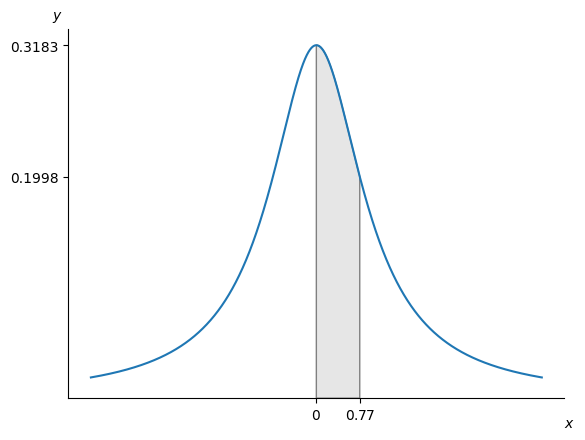

In [49]:
# Gráfico da Distribuição de Cauchy Padrão
x = np.linspace(-4, 4,num=5000)
y = func(x)


fig, ax = plt.subplots()

ax.plot(x,y, label='Distribuição Cauchy Padrão')
ax.set_ylim(bottom=0)

# Área abaixo da curva
a, b = 0, 0.77
ix = np.linspace(a,b,num=500)
iy = func(ix)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

# Textos
fig.text(0.9, 0.05, '$x$')
fig.text(0.1, 0.9, '$y$')

ax.spines[['top', 'right']].set_visible(False)
ax.set_xticks([a, b], labels=['$0$', '$0.77$'])
ax.set_yticks([func(a), func(b)])
plt.show()



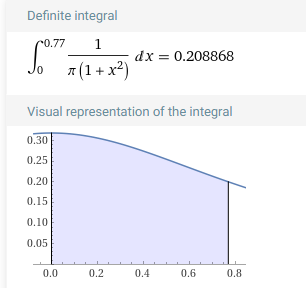